# AutoML
----------------

This example shows how to use atom's AutoML implementation to automatically search for an optimized pipeline.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=6, verbose=2, warnings=False, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 6 cores.

Dataset stats ==================== >>
Shape: (569, 31)
Scaled: False
Outlier values: 174 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
|    |     dataset |       train |        test |
| -- | ----------- | ----------- | ----------- |
| 0  |   212 (1.0) |   167 (1.0) |    45 (1.0) |
| 1  |   357 (1.7) |   289 (1.7) |    68 (1.5) |



In [4]:
# It's possible to add custom estimators to the pipeline
atom.add(StandardScaler())

Fitting StandardScaler...
Applying StandardScaler to the dataset...


In [5]:
# Check that the scaling worked
atom.scaled

True

In [6]:
# Find an optimized pipeline using AutoML
atom.automl(
    scoring="accuracy",
    max_time_mins=5,
    template="Transformer-Transformer-Classifier",
)

Fitting automl algorithm...



Generation 1 - Current best internal CV score: 0.9780936454849499

Generation 2 - Current best internal CV score: 0.9780936454849499

Generation 3 - Current best internal CV score: 0.9780936454849499

Generation 4 - Current best internal CV score: 0.9780936454849499

Generation 5 - Current best internal CV score: 0.9824653607262303

Generation 6 - Current best internal CV score: 0.9824653607262303

Generation 7 - Current best internal CV score: 0.9824653607262303

Generation 8 - Current best internal CV score: 0.9824653607262303

Generation 9 - Current best internal CV score: 0.9824653607262303

5.03 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(StandardScaler(Normalizer(input_matrix, norm=max)), alpha=0.01, learning_rate_init=0.5)

Merging automl results with atom...
Applying Normalizer to the dataset...
Applying StandardScaler to the dataset...


## Analyze the results

In [7]:
# The tpot estimator can be accessed for further analysis
atom.tpot

TPOTClassifier(max_time_mins=5, n_jobs=6, random_state=1, scoring='accuracy',
               template='Transformer-Transformer-Classifier', verbosity=2)

In [8]:
# Check the new transformers in the branch
atom.branch.status()

Branch: master
 --> Pipeline: 
   >>> StandardScaler
     --> copy: True
     --> with_mean: True
     --> with_std: True
   >>> Normalizer
     --> norm: max
     --> copy: True
   >>> StandardScaler
     --> copy: True
     --> with_mean: True
     --> with_std: True
 --> Models: MLP


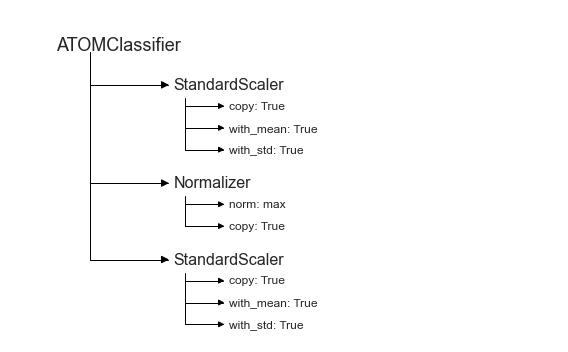

In [9]:
# Or draw the pipeline
atom.plot_pipeline()

In [10]:
# Note that the model is also merged with atom
atom.mlp

Multi-layer Perceptron
 --> Estimator: MLPClassifier
 --> Evaluation: accuracy: 0.9646

In [11]:
# The pipeline can be exported to a sklearn-like pipeline
pl = atom.export_pipeline(model="mlp")
print(pl)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('normalizer', Normalizer(norm='max')),
                ('standardscaler2', StandardScaler()),
                ('MLP',
                 MLPClassifier(alpha=0.01, learning_rate_init=0.5,
                               random_state=1))])
